In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [2]:
images_setosa = np.array([np.array(Image.open("iris-setosa/"+image).resize((100,100))) for image in os.listdir("iris-setosa/")])

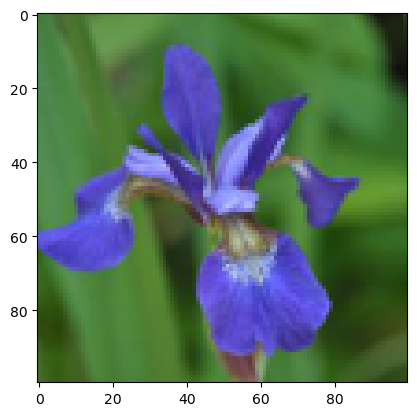

In [3]:
plt.imshow(images_setosa[0])
plt.show()

In [4]:
def pre_normalize(X):
    X=X/255 #pixels in [0,1]
    mu=X.mean(axis=0)
    std=X.std(axis=0)
    std_filled=std.copy()
    std_filled[std==0]=1 # such that dividing by 0 gives no error/NaN
    Xbar=(X-mu)/std
    return Xbar,mu,std

In [5]:
def eig(S):
    values,vectors=np.linalg.eig(S)
    ind=np.argsort(values)[::-1] #reverses order
    return values[ind], vectors[:,ind]  

In [6]:
def projection_matrix(B):
    return (B@np.linalg.inv(B.T@B)@B.T)

In [ ]:
def PCA(X,num_components):
    N=X.shape[0]
    S=(X@X.T)/N
    values,vectors=eig(S)
    B=X.T@np.real(vectors[:,:num_components])
    pmatrix = projection_matrix(B.astype(np.float32))
    return (pmatrix@X.T).T